In [1]:
from trackeddy.trackeddy import *
import matplotlib.pyplot as plt
import cmocean as cm

In [2]:
path = '/Users/jmtzmo/Downloads/sla_snapshot_KEx.nc'

TEddy = TrackEddy(path=path,variable='sla')

In [3]:
TEddy.rawdata = TEddy.rawdata.where(TEddy.rawdata < 1e10, np.nan ).sel(lon=slice(141,180))
TEddy.X,TEddy.Y = np.meshgrid(TEddy.rawdata.lon,TEddy.rawdata.lat)

In [4]:
TEddy.filter=None

In [23]:
TEddy._filter_data_(TEddy.rawdata,filter='space')

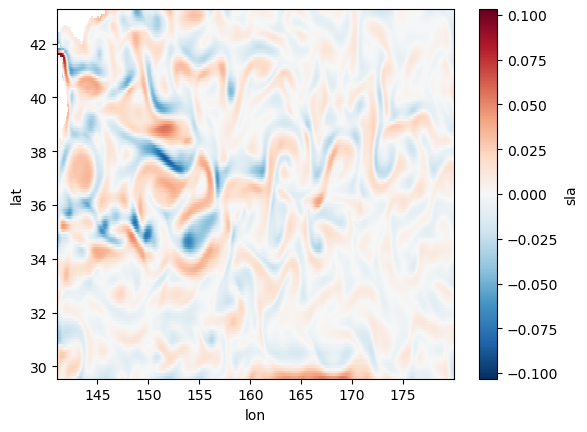

In [24]:
TEddy.data2track.plot()

In [25]:
positive_levels = np.round(np.hstack((np.arange(0.015,0.05,0.1), np.linspace(0.05,0.2,10))),3)
3
negative_levels = - np.flipud(positive_levels)

levels = np.hstack((negative_levels,positive_levels))

In [26]:
# plot_args = {'alpha':0.5,'markersize':10}

# for level in levels:
# # level = 0.05
#     eddies, discarded = TEddy._detect_one_level(level)
#     TEddy.plot_eddy_detection_in_level(eddies, discarded, plot_args)

#     plt.show()
    

In [27]:

df_eddy_multilevel_store = TEddy._detect_snapshot(0,levels)


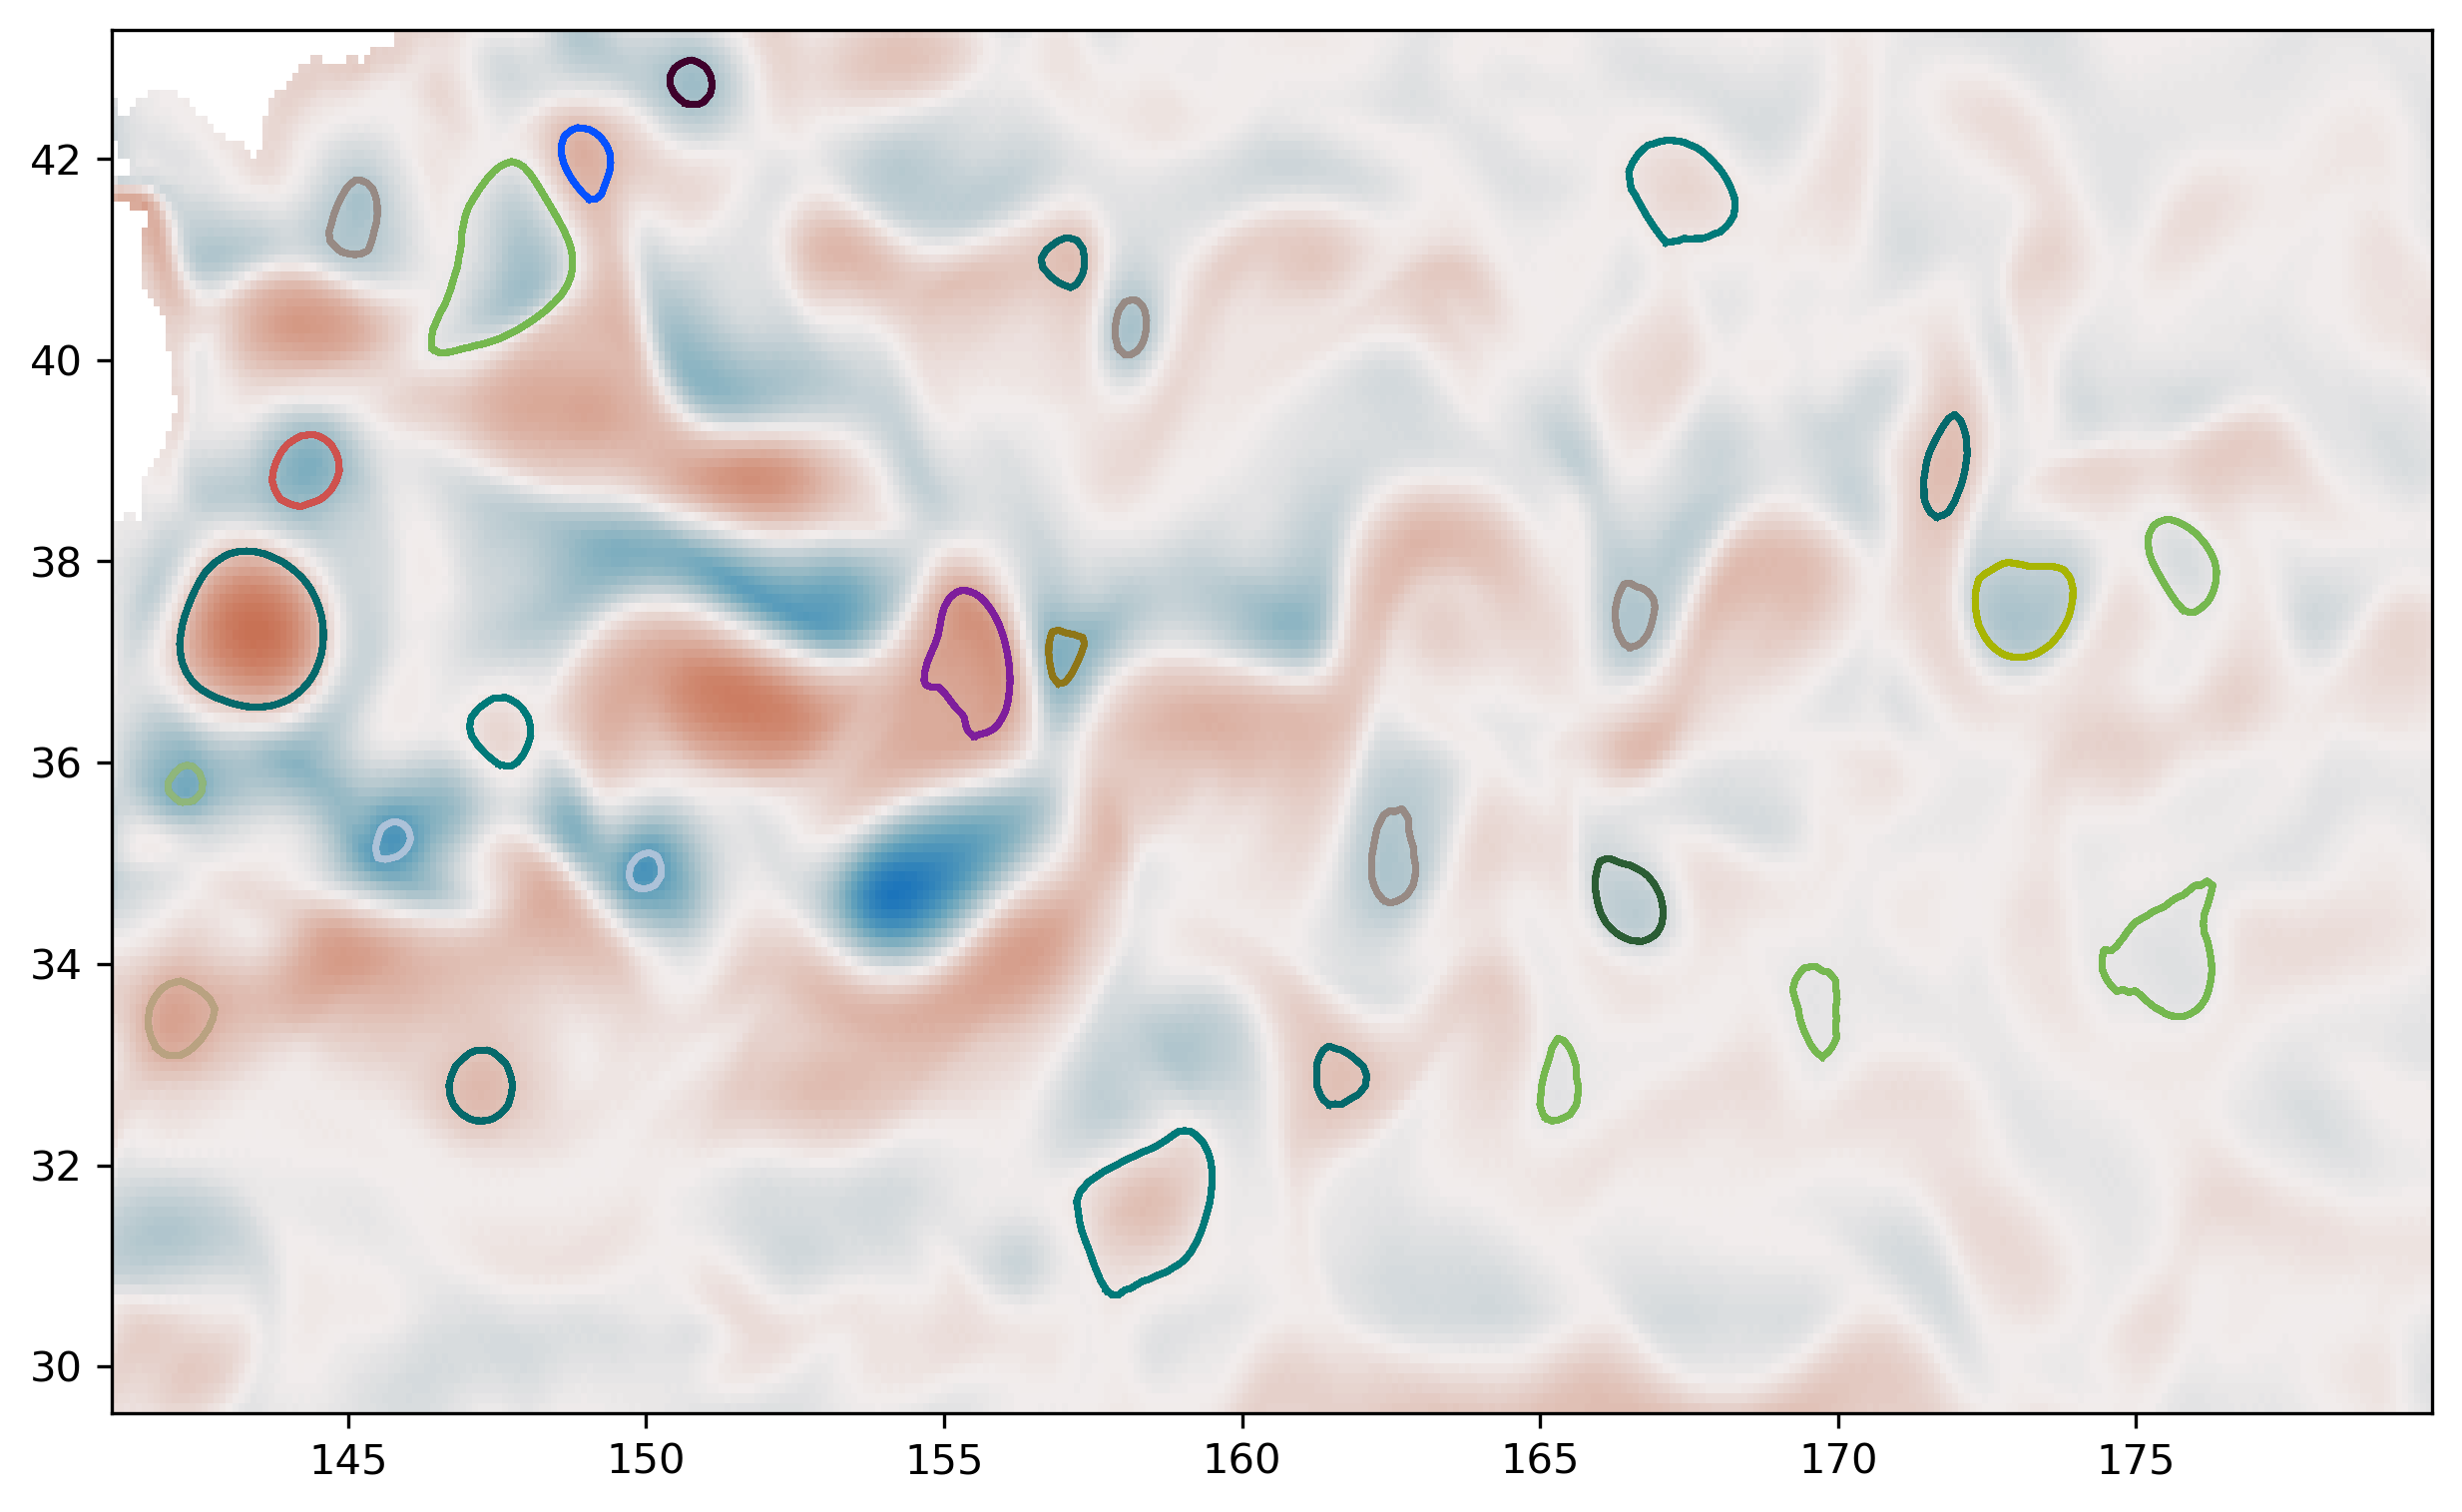

In [28]:
TEddy.plot_eddy_detection_multilevel(df_eddy_multilevel_store)

In [32]:
TEddy.identification_criteria['eccentricity'] = 0.95 # 1 
TEddy.identification_criteria['ellipse_fit'] = 0.85 # 
TEddy.identification_criteria['gaussian_fit'] = 0.85

In [33]:
df_eddy_multilevel_store = TEddy._detect_snapshot(0,levels)

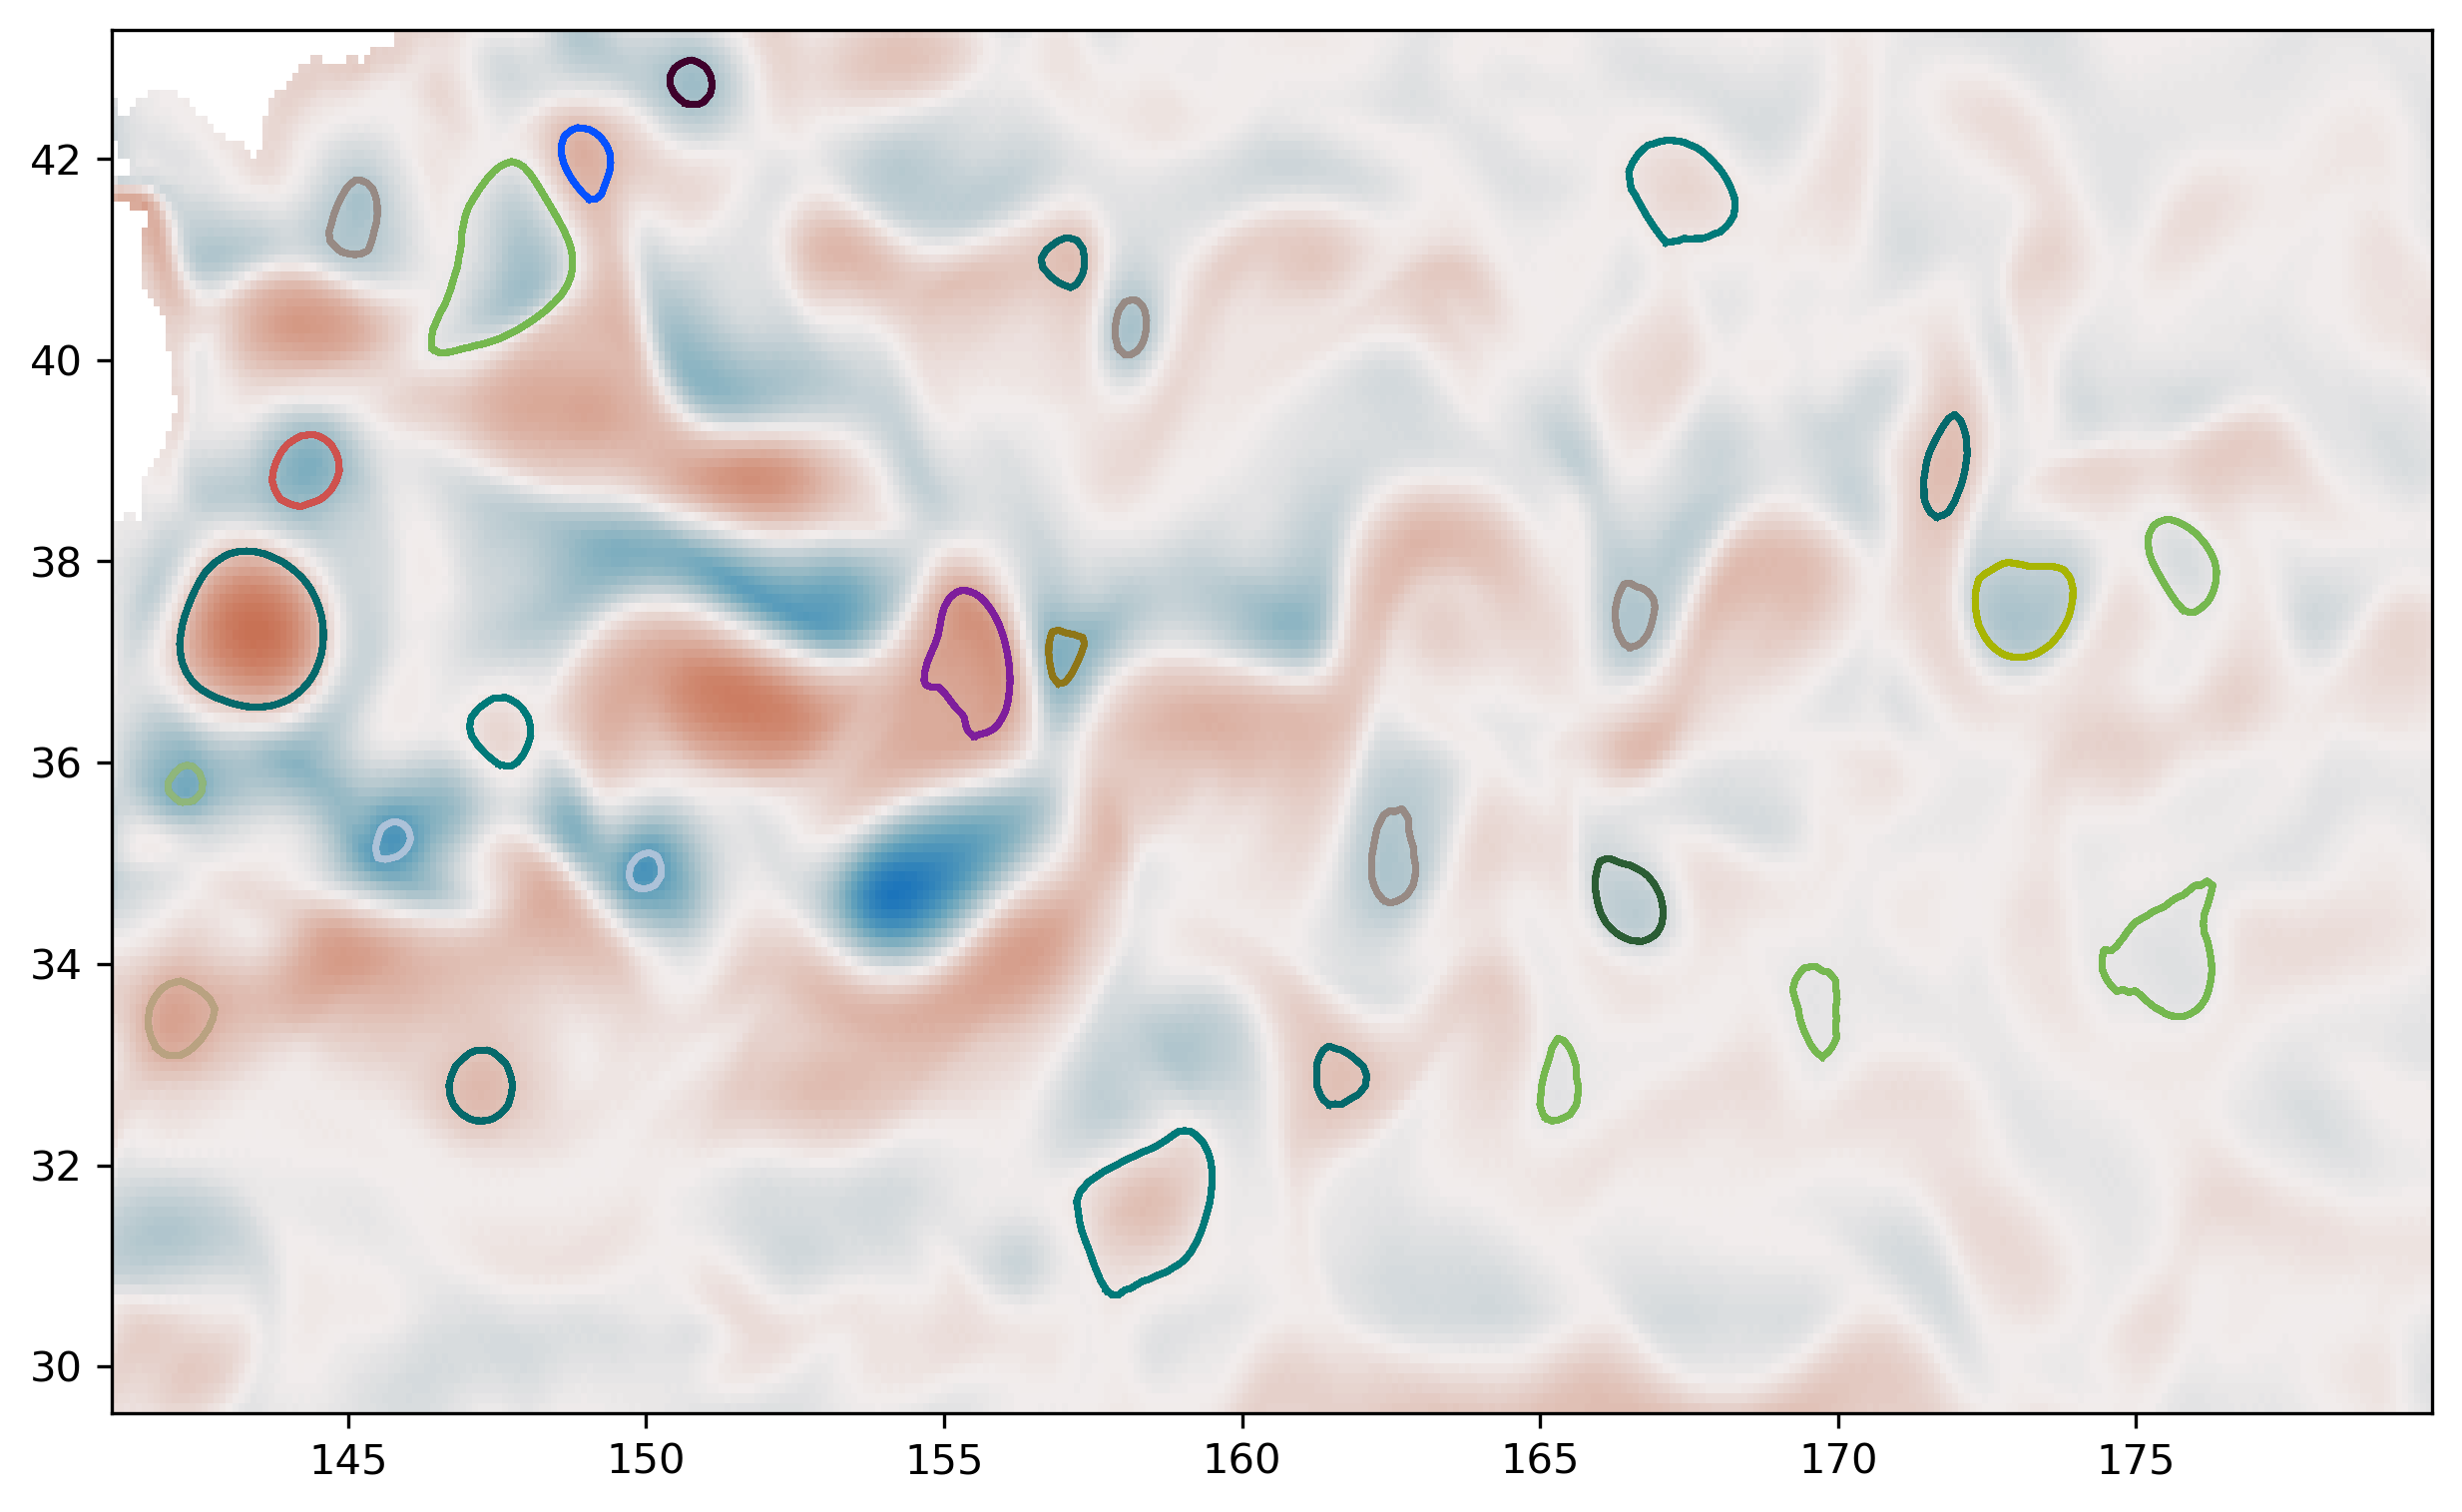

In [ ]:
TEddy.plot_eddy_detection_multilevel(df_eddy_multilevel_store)